Mean       = 0.4179
Std Dev    = 1.5248
Skewness   = 1.1082
Kurtosis   = 1.0215
Central Moment μ3: 3.9286e+00
Central Moment μ4: 2.1739e+01
Central Moment μ5: 6.6684e+01
Central Moment μ6: 2.9270e+02
Central Moment μ7: 1.0579e+03
Central Moment μ8: 4.4398e+03
Central Moment μ9: 1.7143e+04
Central Moment μ10: 7.1657e+04


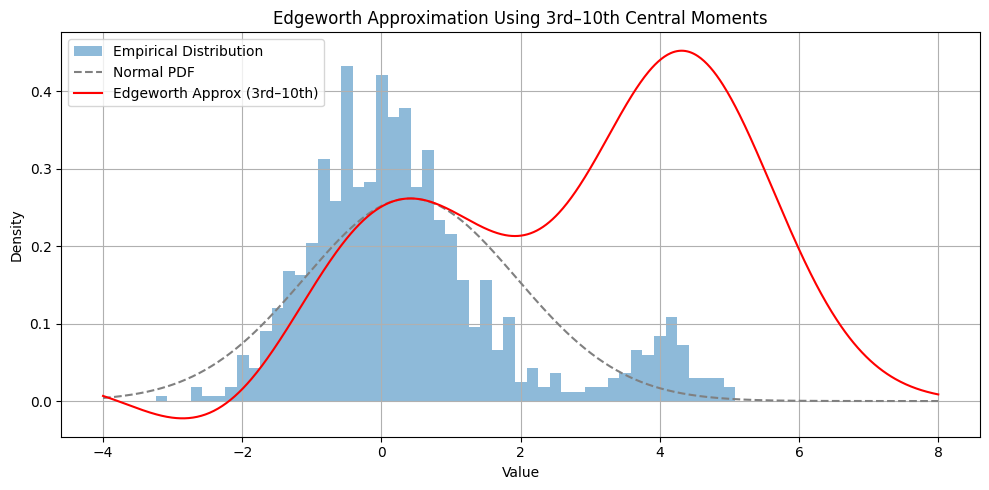

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis, moment

# Step 1: Simulate skewed and heavy-tailed data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(0, 1, 900),
    np.random.normal(4, 0.5, 100)
])

# Step 2: Basic statistics
mean_val = np.mean(data)
std_val = np.std(data)
skew_val = skew(data)
kurt_val = kurtosis(data, fisher=True)

# Step 3: Calculate central moments (3rd to 10th)
moments = {
    f"μ{r}": moment(data, moment=r) for r in range(3, 11)
}

# Display statistics
print(f"Mean       = {mean_val:.4f}")
print(f"Std Dev    = {std_val:.4f}")
print(f"Skewness   = {skew_val:.4f}")
print(f"Kurtosis   = {kurt_val:.4f}")
for r, val in moments.items():
    print(f"Central Moment {r}: {val:.4e}")

# Step 4: Construct Edgeworth-style approximation
x = np.linspace(-4, 8, 800)
phi = norm.pdf(x, loc=mean_val, scale=std_val)
z = (x - mean_val) / std_val

# Correction terms using raw moments (scaled)
correction = (
    1 +
    (skew_val / 6) * z**3 +
    (kurt_val / 24) * z**4 +
    (moments["μ5"] / (120 * std_val**5)) * z**5 +
    (moments["μ6"] / (720 * std_val**6)) * z**6 +
    (moments["μ7"] / (5040 * std_val**7)) * z**7 +
    (moments["μ8"] / (40320 * std_val**8)) * z**8 +
    (moments["μ9"] / (362880 * std_val**9)) * z**9 +
    (moments["μ10"] / (3628800 * std_val**10)) * z**10
)

# Final approximation
edgeworth_pdf = phi * correction

# Step 5: Plot
plt.figure(figsize=(10, 5))
plt.hist(data, bins=50, density=True, alpha=0.5, label="Empirical Distribution")
plt.plot(x, phi, '--', label="Normal PDF", color='gray')
plt.plot(x, edgeworth_pdf, label="Edgeworth Approx (3rd–10th)", color='red')
plt.title("Edgeworth Approximation Using 3rd–10th Central Moments")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


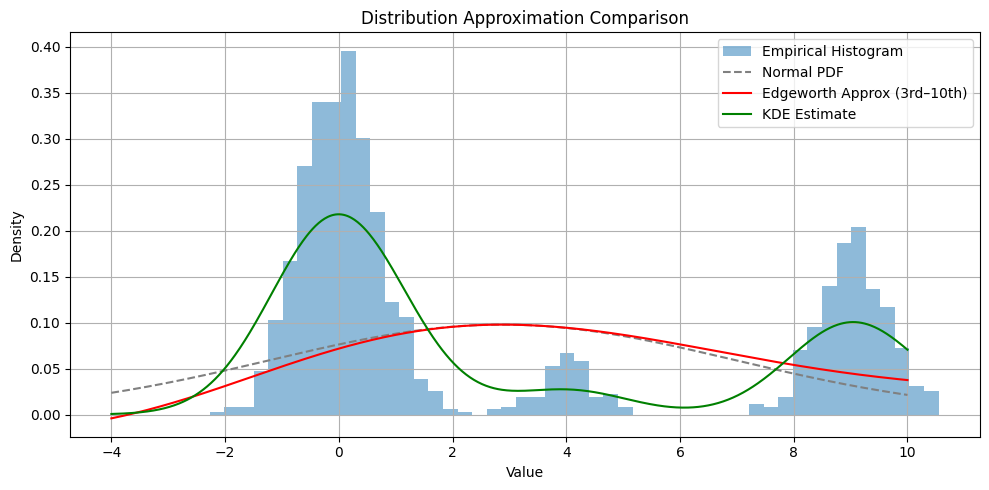

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis, moment, gaussian_kde

# Step 1: Simulate skewed and heavy-tailed data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(0, 0.7, 900),
    np.random.normal(4, 0.5, 100),
    # np.random.normal(7, 0.8, 400),
    np.random.normal(9, 0.6, 400),
    
])

# Step 2: Basic statistics
mean_val = np.mean(data)
std_val = np.std(data)
skew_val = skew(data)
kurt_val = kurtosis(data, fisher=True)

# Step 3: Central moments (3rd to 10th)
moments = {
    f"μ{r}": moment(data, moment=r) for r in range(3, 11)
}

# Step 4: Build Edgeworth-style approximation
x = np.linspace(-4, 10, 800)
phi = norm.pdf(x, loc=mean_val, scale=std_val)
z = (x - mean_val) / std_val

correction = (
    1 +
    (skew_val / 6) * z**3 +
    (kurt_val / 24) * z**4 +
    (moments["μ5"] / (120 * std_val**5)) * z**5 +
    (moments["μ6"] / (720 * std_val**6)) * z**6 +
    (moments["μ7"] / (5040 * std_val**7)) * z**7 +
    (moments["μ8"] / (40320 * std_val**8)) * z**8 +
    (moments["μ9"] / (362880 * std_val**9)) * z**9 +
    (moments["μ10"] / (3628800 * std_val**10)) * z**10
)

edgeworth_pdf = phi * correction

# Step 5: KDE estimate
kde = gaussian_kde(data)
kde_vals = kde.evaluate(x)

# Step 6: Visualization
plt.figure(figsize=(10, 5))
plt.hist(data, bins=50, density=True, alpha=0.5, label="Empirical Histogram")
plt.plot(x, phi, '--', label="Normal PDF", color='gray')
plt.plot(x, edgeworth_pdf, label="Edgeworth Approx (3rd–10th)", color='red')
plt.plot(x, kde_vals, label="KDE Estimate", color='green')
plt.title("Distribution Approximation Comparison")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
